In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#use sample and axis 1. 100 portfolios with 2 stocks, 100 with 5, etc. It is to help you get a nice scatterplot

In [2]:
pd.set_option('display.float_format', '{:.4f}'.format)
%precision 4
plt.rcParams['figure.dpi'] = 100

In [3]:
import yfinance as yf
import requests_cache
session = requests_cache.CachedSession(expire_after='1D')

# Calculate daily returns for the S&P 100 stocks.

In [4]:
url = 'https://en.wikipedia.org/wiki/S%26P_100'
stock_names = pd.read_html(url)
stocks = stock_names[2]['Symbol'].to_list()
#wiki[1].sample(3, axis = 1)

In [5]:
stocks.remove('BRK.B')

In [6]:
stocks.append('BRK-B')

In [7]:
stock_prices = yf.download(stocks, start='2020-01-01', end='2022-09-01', session=session)

[*********************100%***********************]  101 of 101 completed


In [8]:
daily_returns = stock_prices['Adj Close'].pct_change()
daily_returns

,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,UNH,UNP,UPS,USB,V,VZ,WBA,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.0097,-0.0095,-0.0122,-0.0017,-0.0078,-0.0077,-0.0102,-0.0068,0.0005,-0.0121,...,-0.0101,-0.0071,-0.0006,-0.0117,-0.0080,-0.0106,0.0000,-0.0061,-0.0088,-0.0080
2020-01-06,0.0080,0.0079,0.0052,-0.0065,0.0057,0.0008,-0.0043,0.0077,-0.0003,0.0149,...,0.0069,-0.0086,-0.0045,-0.0137,-0.0022,-0.0022,0.0086,-0.0060,-0.0020,0.0077
2020-01-07,-0.0047,-0.0057,-0.0056,-0.0216,-0.0010,-0.0056,-0.0029,-0.0094,-0.0213,0.0021,...,-0.0060,-0.0076,-0.0017,-0.0095,-0.0026,-0.0111,-0.0050,-0.0083,-0.0093,-0.0082
2020-01-08,0.0161,0.0071,0.0041,0.0020,0.0134,0.0117,-0.0087,0.0008,0.0087,-0.0078,...,0.0211,0.0110,0.0057,-0.0021,0.0171,0.0018,-0.0584,0.0030,-0.0034,-0.0151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-26,-0.0377,-0.0214,-0.0377,-0.0376,-0.0567,-0.0409,-0.0617,-0.0205,-0.0263,-0.0476,...,-0.0227,-0.0326,-0.0296,-0.0266,-0.0330,-0.0112,-0.0217,-0.0313,-0.0314,-0.0123
2022-08-29,-0.0137,-0.0047,-0.0006,-0.0100,-0.0151,-0.0038,-0.0295,-0.0053,-0.0056,-0.0073,...,0.0010,0.0049,-0.0083,-0.0084,-0.0028,0.0018,-0.0011,-0.0011,0.0097,0.0230
2022-08-30,-0.0153,-0.0012,0.0035,-0.0089,-0.0005,-0.0078,-0.0175,-0.0011,-0.0243,-0.0082,...,-0.0131,-0.0254,-0.0113,-0.0041,-0.0047,-0.0185,-0.0217,0.0050,-0.0030,-0.0381


# How well do annualized average returns in 2020 predict those in 2021?

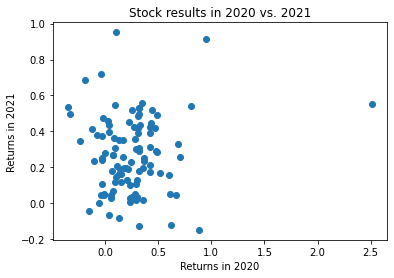

In [9]:
x = daily_returns.loc['2020'].mean().mul(252),
y = daily_returns.loc['2021'].mean().mul(252)

plt.xlabel('Returns in 2020')
plt.ylabel('Returns in 2021')
plt.title('Stock results in 2020 vs. 2021')

plt.scatter(x, y)
plt.show()

# How well do annualized standard deviations of returns in 2020 predict those in 2021?

/tmp/ipykernel_78979/4065453252.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  a = daily_returns['2020'].std().mul(np.sqrt(252))
/tmp/ipykernel_78979/4065453252.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  b = daily_returns['2021'].std().mul(np.sqrt(252))


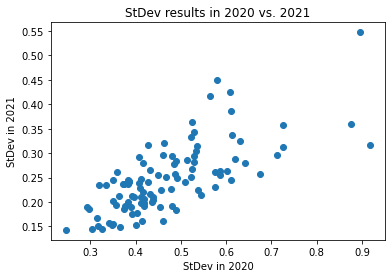

In [10]:
a = daily_returns['2020'].std().mul(np.sqrt(252))
b = daily_returns['2021'].std().mul(np.sqrt(252))

plt.xlabel('StDev in 2020')
plt.ylabel('StDev in 2021')
plt.title('StDev results in 2020 vs. 2021')

plt.scatter(a, b)
plt.show()

# What are the mean, median, minimum, and maximum pairwise correlations between two stocks?

In [11]:
correlations = daily_returns.corr()

In [12]:
mean_per_stock = correlations.mean()
mean_total = mean_per_stock.mean()
'The mean is ' + str(round(mean_total, 4)) + '.'

'The mean is 0.4802.'

In [13]:
median_per_stock = correlations.median()
median_total = median_per_stock.median()
'The median is ' + str(round(median_total, 4)) + '.'

'The median is 0.4819.'

In [14]:
lowest_correlations = correlations.unstack().sort_values()
min_corr = lowest_correlations.iloc[0]
'The minimum pairwise correlation is ' + str(round(min_corr, 4)) + '.'

'The minimum pairwise correlation is 0.0604.'

In [15]:
highest_correlations_no_same = correlations.unstack().sort_values().drop_duplicates().iloc[:-1]
max_corr = highest_correlations_no_same.iloc[-1]
'The maximimum pairwise correlation is ' + str(round(max_corr, 4)) + '.'

'The maximimum pairwise correlation is 0.9937.'

The outliers in this analysis are the minimum and maximum. The minimum outlier stems from a significant difference in the stocks analyzed. This is likely a result of a difference in industries as technology companies will experience highly volatile and perhaps large returns while more stable sectors like industrials will experience much less volatile and more market consistent returns. Additionally, the maximum outlier is a result of the exact same companies but different class of stock being analyzed. For example, Google has a Class A (GOOGL) and Class C (GOOG) stock. Therefore, while two different stocks are being analyzed, the returns for Google on their Class A and C will be virtually the exact same.  

# Plot annualized average returns versus annualized standard deviations of returns.


In [16]:
# creates a plot given dataframe and variables
def create_plot(plot_data, plot_kind, x_var, y_var, labels=False, trendline=False, **other_vars):
    plot = plot_data.plot(kind=plot_kind, x=x_var, y=y_var, **other_vars)
    # labeling to identify outliers
    if labels:
        for idx, r in plot_data.iterrows():
            plot.annotate(f'${idx}', (r[x_var],r[y_var]))
    # trendline for identifying outliers
    if trendline:
        m,b = np.polyfit(x=plot_data.loc[:, x_var], y=plot_data.loc[:, y_var], deg=1)
        plt.axline(xy1=(0, b), slope=m)
    plt.show()
    return plot

# creates plot of returns vs stdevs when given returns as a dataframe
def create_return_stdev_plot(daily_returns, **other_vars):
    annual_returns = daily_returns.mean().mul(252)
    annual_stdevs = daily_returns.std().mul(np.sqrt(252))
    stock_plot_data = pd.concat([annual_returns.rename('return').mul(100), annual_stdevs.rename('stdev').mul(100)], axis=1)
    create_plot(stock_plot_data, 'scatter', 'stdev', 'return', 
            title='Annualized Average Returns vs Annualized Standard Deviation of Returns', 
            xlabel='Standard Deviation (%)', ylabel='Return (%)', **other_vars)

/home/richard/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


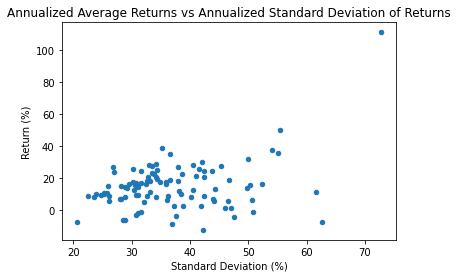

In [17]:
create_return_stdev_plot(daily_returns)

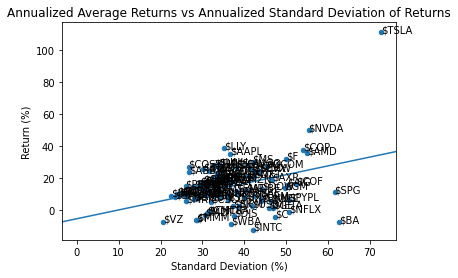

In [18]:
plot = create_return_stdev_plot(daily_returns, labels=True, trendline=True)

Here, we observe the largest outlier is Tesla ($TSLA), which although containing a high standard deviation, still overperformed its predicted** performance by a relatively large margin of approximately 80%.

On the flip side, we observe the outlier of Boeing ($BA). While similar to Tesla in having a high standard deviation, Boeing underperformed its predicted** return by about 35%.

** prediction via linear regression

# Repeat the exercise above (question 5) with 100 random portfolios of 2, 5, 10, and 25 stocks.

In [19]:
# generate a given number of portfolios of given number of stocks from given data
def generate_portfolios(stock_data, num_stocks, num_portfolios=100):
    # 100 random portfolios of 2 stocks
    np.random.seed(15)
    portfolio_returns = pd.DataFrame({}, index=stock_data.index)
    portfolios = []
    while len(portfolios) <= num_portfolios:
        # get random portfolios
        sample_returns = stock_data.sample(num_stocks, axis=1)
        # Guarantee unique samples
        if set(sample_returns.columns) in portfolios:
            break
        portfolios.append(set(sample_returns.columns))
        # Get portfolio returns, add to dataframe 
        portfolio_returns[str(set(sample_returns.columns))] = sample_returns.mean(axis=1)
    return portfolio_returns

/tmp/ipykernel_78979/2472999032.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_returns[str(set(sample_returns.columns))] = sample_returns.mean(axis=1)
/home/richard/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


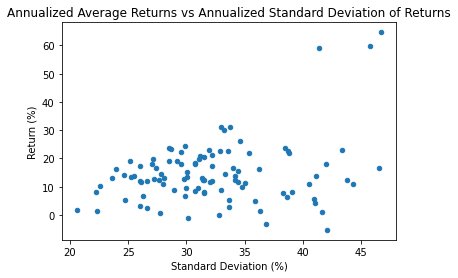

In [20]:
# plot 100 random portfolios of 2 stocks
create_return_stdev_plot(generate_portfolios(daily_returns, 2))

/tmp/ipykernel_78979/2472999032.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_returns[str(set(sample_returns.columns))] = sample_returns.mean(axis=1)
/home/richard/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


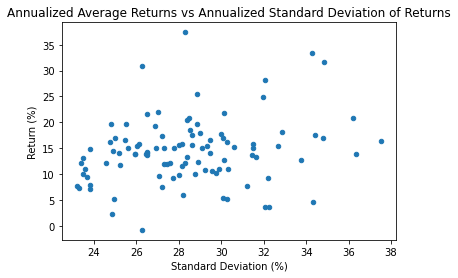

In [21]:
# plot 100 random portfolios of 5 stocks
create_return_stdev_plot(generate_portfolios(daily_returns, 5))

/tmp/ipykernel_78979/2472999032.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_returns[str(set(sample_returns.columns))] = sample_returns.mean(axis=1)
/home/richard/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


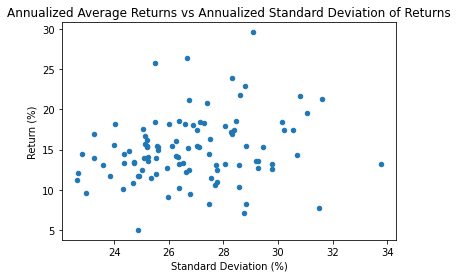

In [22]:
# plot 100 random portfolios of 10 stocks
create_return_stdev_plot(generate_portfolios(daily_returns, 10))

/tmp/ipykernel_78979/2472999032.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_returns[str(set(sample_returns.columns))] = sample_returns.mean(axis=1)
/home/richard/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


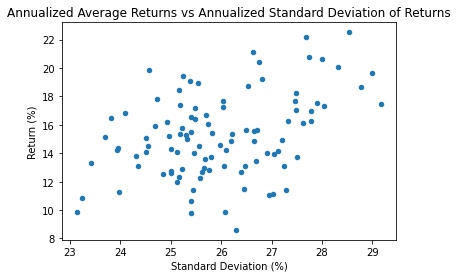

In [23]:
# plot 100 random portfolios of 25 stocks
create_return_stdev_plot(generate_portfolios(daily_returns, 25))